<a href="https://colab.research.google.com/github/yeb2Binfang/ECE-GY6143ML/blob/main/Lab/Unit11/pca_inclass_soln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA In-Class Exercise Solutions



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1:  Computing PCs Manually on a Synthetic Dataset

We begin by showing how to compute and visualize PCs manually on a simple 2-dim synthentic data set.  First, run the following code to generate 100 samples of synthetic data.  Each data point has `d=2` dimensions.

In [ ]:
p = 0.5
std = 0.2
s = np.array([2,1])
d = 2
ns = 100

U = np.random.normal(0,std,(ns,d))
v = np.random.uniform(0,1,ns)
X = U + (v < p)[:,None]*s[None,:]

print(X[:10])

[[ 1.98926616  1.18781317]
 [-0.05589312 -0.25479973]
 [ 2.08398376  1.0662439 ]
 [-0.08970391  0.28729989]
 [ 1.89868141  1.11463162]
 [-0.18757627  0.07326735]
 [ 0.17959798 -0.02770245]
 [ 1.94801275  0.75067122]
 [-0.13289827  0.08310323]
 [ 0.00696904  0.19731014]]


Create a scatter plot of the data of the two features of the data, `X[:,0]` and `X[:,1]`.

Text(0, 0.5, 'x1')

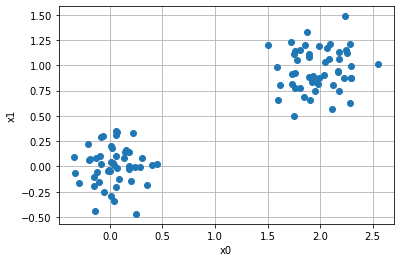

In [ ]:
# TODO
plt.plot(X[:,0], X[:,1], 'o')
plt.grid()
plt.xlabel('x0')
plt.ylabel('x1')

We now manually compute the first principal component.  Later, we will find a faster way using an SVD.

*  Compute `xm` the mean of each of the two features.
*  Compute `Xm`, the matrix of data samples with the means removed
*  Compute the covariance matrix `Q = (1/ns)*Xm.T.dot(Xm)`
*  Compute the eigenvalues `lam` and eigenvectors `V` of `Q` using the `np.linalg.eigh(Q)` command.
*  Set `v0` be the eigenvector corresponding to the largest eigenvalue.  This is is the first PC.

In [ ]:
# TODO
#   xm = ...
#   Q = ...
#   lam, V = ...
#   v0 = ...

# Remove the mean from the data
xm = np.mean(X,axis=0)
Xm = X - xm[None,:]

# Compute the covariance matrix
Q = 1/ns*(Xm.T.dot(Xm))

# Compute the eigenvalues and the largest eigenvector
lam, V = np.linalg.eigh(Q)
im = np.argmax(lam)
lam0 = lam[im]
v0 = V[:,im]

In [ ]:
lam, V = np.linalg.eigh(Q)
print("the eigenvalues is:")
print(lam)
print()
print("the eigenvector is:")
print(V)

the eigenvalues is:
[0.03755178 1.22172971]

the eigenvector is:
[[ 0.43918752 -0.89839541]
 [-0.89839541 -0.43918752]]


In [ ]:
im = np.argmax(lam)
lam0 = lam[im]
v0 = V[:,im]
print("the largest eigenvalues is:")
print(lam0)
print()
print("the largest eigenvector is:")
print(v0)

the largest eigenvalues is:
1.2217297052316276

the largest eigenvector is:
[-0.89839541 -0.43918752]


Compute the projection of the data vectors onto the first PC with the following:
    
    z[i] = Xm[i,:].dot(v0)
    Xhat[i,:] = xm + v0*z[i]
    
Note that we remove the mean when projecting and then add it back.
Create a scatter plot with:

*  The original data points `X[:,0], X[:,1]` in one color
*  The projected data points `Xhat[:,0], Xhat[:,1]` in a second color

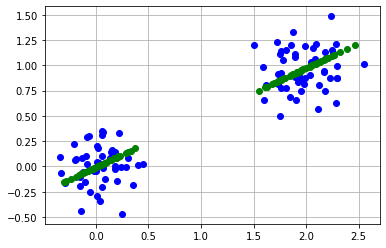

In [ ]:
z = Xm.dot(v0)
Xhat = z[:,None]*v0[None,:] + xm[None,:]

plt.plot(X[:,0], X[:,1], 'bo')
plt.plot(Xhat[:,0], Xhat[:,1], 'go')
plt.grid()


In [ ]:
z = Xm.dot(v0)
print(z)

[-1.17094621  1.2999931  -1.20264836  1.09228517 -1.05742486  1.27421367
  0.98869067 -0.94189704  1.22077141  1.04495701 -0.81991065  1.17534007
  1.12406727 -1.12353514  0.8849959  -1.03671434 -1.44955766  1.46211656
 -0.78259304 -0.82432454 -1.38669539 -0.67364145 -0.83304164  1.40243083
  1.09731817  1.25846624  1.2867728   1.20733034 -1.27390732 -1.21917962
 -0.78943956 -1.15115393 -0.92010987  1.15881224 -0.65412674  1.3173459
 -0.94962186  0.93022574  1.04009973 -1.29025955 -1.08697492 -0.86793631
 -0.99472449 -0.74385188 -1.18887931  1.02495919 -1.05869643  1.11908959
  1.09897505  1.22801163  1.30414702 -1.13211765 -0.58376285  0.9121029
 -0.9860234   1.46912548 -1.14904131 -1.00936064  0.97654225 -1.52485354
 -1.30626613  1.17781593 -1.00092667  0.9440066   0.90258221 -1.35616318
  0.93031405 -0.95478565  1.17457522 -0.72666238  1.27626372 -1.60460691
 -0.94540301 -1.2478829   0.97694739  1.08429491  0.93214722 -1.23579203
 -1.032105   -1.32072221  1.25244873 -1.31270823  0.7

In [ ]:
Xhat = np.tile(xm,(ns,1))
print(Xhat)

[[1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]
 [1.02461756 0.49491933]


## Exercise 2:  Computing the Approximation Error

We now verify the approximation errors.  For each `k`:

*  Compute `Z`, the PC coefficients of `X` 
*  Compute `Xhat`, the PC approximation of `X` using `k` PC coefficients
*  Compute the approximation error, `err[k]` the average error `1/ns sum_{ij} (X[i,j]-Xhat[i,j])**2)`
*  Compute the expected approximation error, `err_pred[k]` the expected approximation error based on the eigenvalues `lam`.

Remember you will need to sort the eigenvalues in descending order.  You can use the command

     I = np.argsort(lam)[::-1]

In [ ]:
# Sort the eigenvalues in descending order
I = np.argsort(lam)[::-1]

# TODO
#   err = ...
#   err_pred = ...

Z = Xm.dot(V)
err = np.zeros(d+1)
err_pred = np.zeros(d+1)


for k in range(d+1):
    
    Xhat = np.tile(xm,(ns,1))
    err_pred[k] = np.sum(lam)
    
    if k > 0:
        Xhat += Z[:,I[:k]].dot((V[:,I[:k]]).T)
        err_pred[k] -= np.sum(lam[I[:k]])
        print(err_pred[k])
        
    err[k] = np.mean(np.sum((X-Xhat)**2,axis=1))
     

0.03755177508571306
0.0


In [ ]:
print(err)

print(err_pred)

[1.25928148e+00 3.75517751e-02 1.84331827e-32]
[1.25928148 0.03755178 0.        ]


In [ ]:
print(Xhat)

[[ 1.98926616e+00  1.18781317e+00]
 [-5.58931229e-02 -2.54799731e-01]
 [ 2.08398376e+00  1.06624390e+00]
 [-8.97039132e-02  2.87299894e-01]
 [ 1.89868141e+00  1.11463162e+00]
 [-1.87576271e-01  7.32673523e-02]
 [ 1.79597985e-01 -2.77024503e-02]
 [ 1.94801275e+00  7.50671219e-01]
 [-1.32898273e-01  8.31032262e-02]
 [ 6.96903901e-03  1.97310139e-01]
 [ 1.73068483e+00  9.17479284e-01]
 [-2.08079318e-02 -4.27430466e-02]
 [ 2.45272403e-01 -4.70288328e-01]
 [ 2.12500174e+00  8.02202733e-01]
 [ 2.82225764e-01 -1.53038352e-03]
 [ 1.89043142e+00  1.08435124e+00]
 [ 2.28978928e+00  1.20744683e+00]
 [-1.42726167e-01 -4.46319403e-01]
 [ 1.73743480e+00  8.18701967e-01]
 [ 1.84699625e+00  6.89604490e-01]
 [ 2.24554826e+00  1.15481251e+00]
 [ 1.62250581e+00  8.05723682e-01]
 [ 1.81316325e+00  7.78661012e-01]
 [-3.42248437e-01  9.77206905e-02]
 [ 4.02342399e-02  1.00405540e-02]
 [ 9.09773049e-03 -2.93190218e-01]
 [-1.96714584e-01  6.33642520e-02]
 [-8.96174169e-02  2.51729414e-02]
 [ 2.09307194e+00  1

## Exercise 3:  Computing the PCA via the SVD

*  Compute the matrix `A = 1/np.sqrt(ns)*Xm`
*  Compute the economy SVD of `A` with the `np.linalg.svd()` command.  Use `full_matrices=False` option.  Print the dimensions of the components of the SVD

In [ ]:
# TODO
#   A = ...
#   U, s, Vtr = np.linalg.svd(...)
A = 1/np.sqrt(ns)*Xm
U, s, Vtr = np.linalg.svd(A, full_matrices=False)

Verify that the singular values squared `s**2` match the eigenvalues of the covariance matrix `Q`. 

In [ ]:
# TODO
print(s**2)
print(lam)

[1.22172971 0.03755178]
[0.03755178 1.22172971]


Compute the coefficients, `Zhat` of `X` on the PC vectors.  Make sure they match `Z` computed above (up to some sign and permutations).

In [ ]:
# TODO
Zhat = np.sqrt(ns)*U*s[None,:]

In [ ]:
print(Zhat[:3,:])
print(Z[:3,I])

[[-1.17094621  0.19883101]
 [ 1.2999931  -0.19899736]
 [-1.20264836  0.04801495]]
[[-1.17094621 -0.19883101]
 [ 1.2999931   0.19899736]
 [-1.20264836 -0.04801495]]
